<a href="https://colab.research.google.com/github/GeetaPokuri/MachineLearning/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import kagglehub

# This is the path to the folder from your code
path = kagglehub.dataset_download("mayankanand2701/samsung-stock-price-dataset")

# 1. Construct the full path to the specific CSV file
# You might need to check the exact filename inside the downloaded 'path' folder.
csv_file_name = 'Samsung Dataset.csv'
full_file_path = os.path.join(path, csv_file_name)

# 2. Use pandas to read the file into a new variable, typically called 'df'
df = pd.read_csv(full_file_path)

# 3. Now the 'df' variable holds your dataset. You can display the first few rows.
print("Dataset loaded into the 'df' variable. Here are the first 5 rows:")
print(df.head())

100%|██████████| 114k/114k [00:00<00:00, 418kB/s]

Extracting files...
Dataset loaded into the 'df' variable. Here are the first 5 rows:
         Date    Open    High     Low   Close    Adj Close    Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4449.709961  74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4063.728760  74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4092.859863  54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4034.598877  40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4202.098145  46880000


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6127 non-null   object 
 1   Open       6127 non-null   float64
 2   High       6127 non-null   float64
 3   Low        6127 non-null   float64
 4   Close      6127 non-null   float64
 5   Adj Close  6127 non-null   float64
 6   Volume     6127 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 335.2+ KB
None
               Open          High           Low         Close     Adj Close  \
count   6127.000000   6127.000000   6127.000000   6127.000000   6127.000000   
mean   28370.058756  28644.142321  28084.267994  28360.006528  24504.066849   
std    22589.409269  22764.800972  22394.681276  22567.361619  22041.302899   
min     2540.000000   2760.000000   2420.000000   2730.000000   1988.168701   
25%    10700.000000  10900.000000  10560.000000  10720.000000   7901.6

In [ ]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
df.fillna(method="ffill",inplace=True)
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


/tmp/ipython-input-2268526124.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
for col in ['Open','High','Low','Close','Adj Close','Volume']:
  df[col]=pd.to_numeric(df[col],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6127 non-null   datetime64[ns]
 1   Open       6127 non-null   float64       
 2   High       6127 non-null   float64       
 3   Low        6127 non-null   float64       
 4   Close      6127 non-null   float64       
 5   Adj Close  6127 non-null   float64       
 6   Volume     6127 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 335.2 KB


In [ ]:
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)
print(df.head())

              Open    High     Low   Close    Adj Close    Volume
Date                                                             
2000-01-04  6000.0  6110.0  5660.0  6110.0  4449.709961  74195000
2000-01-05  5800.0  6060.0  5520.0  5580.0  4063.728760  74680000
2000-01-06  5750.0  5780.0  5580.0  5620.0  4092.859863  54390000
2000-01-07  5560.0  5670.0  5360.0  5540.0  4034.598877  40305000
2000-01-10  5600.0  5770.0  5580.0  5770.0  4202.098145  46880000


In [ ]:
r=df.duplicated().sum()
print(r)
if r>0:
  df=df.drop_duplicates()
print(df.duplicated().sum())

31
0


In [ ]:
df["DayOfWeek"]=df.index.dayofweek
df['Month']=df.index.month
df['Prev_close']=df['Close'].shift(1)
df["Moving_avg"]=df["Close"].rolling(window=10).mean()
df["daily_volatility"]=df['High']-df['Low']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6096 entries, 2000-01-04 to 2024-06-13
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              6096 non-null   float64
 1   High              6096 non-null   float64
 2   Low               6096 non-null   float64
 3   Close             6096 non-null   float64
 4   Adj Close         6096 non-null   float64
 5   Volume            6096 non-null   int64  
 6   DayOfWeek         6096 non-null   int32  
 7   Month             6096 non-null   int32  
 8   Prev_close        6095 non-null   float64
 9   Moving_avg        6087 non-null   float64
 10  daily_volatility  6096 non-null   float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 523.9 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.dropna(inplace=True)

In [ ]:
features_to_scale=['Open','High','Low','Close','Volume','Prev_close','Moving_avg','daily_volatility']
scaler=StandardScaler()
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])
df.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Prev_close,Moving_avg,daily_volatility
Date,,,,,,,,,,,
2000-01-17,-0.995256,-0.991770,-0.994663,-0.991346,4442.427734,2.822431,0,1,-1.003114,-1.005276,-0.597598
2000-01-18,-0.988167,-0.992649,-0.991982,-0.991346,4442.427734,1.604324,1,1,-0.991137,-1.005320,-0.755341
2000-01-19,-0.995256,-0.997924,-0.992876,-0.997555,4340.471680,1.266833,2,1,-0.991137,-1.003632,-0.952520
2000-01-20,-1.001458,-0.997924,-0.999132,-0.994007,4398.731934,1.073885,3,1,-0.997347,-1.001766,-0.676469
2000-01-21,-0.997471,-1.000562,-0.996451,-1.001102,4282.211426,0.754754,4,1,-0.993799,-1.000255,-0.913084


In [ ]:
df.dropna(inplace=True)
X=df.drop(columns=['Close'])
y=df['Close']

In [ ]:
split_index=int(len(df)*0.8)
X_train,X_test=X[:split_index],X[split_index:]
y_train,y_test=y[:split_index],y[split_index:]
print(len(X_train))

4869


In [ ]:
import xgboost as xgb
model=xgb.XGBRegressor(objective='reg:squarederror',n_estimators=1000)

In [ ]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)

0.418791031023712


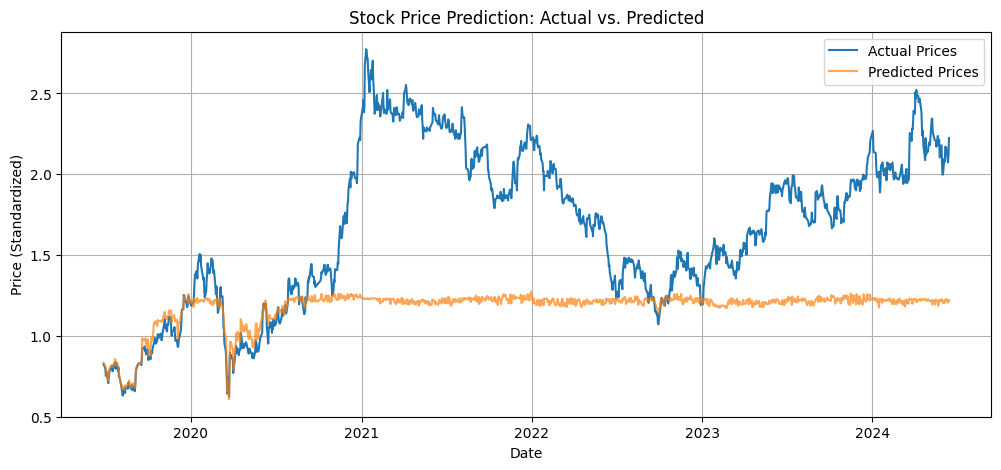

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.index,y_test,label="Actual Prices")
plt.plot(y_test.index,y_pred,label="Predicted Prices",alpha=0.7)
plt.title('Stock Price Prediction: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.grid(True)
plt.show()